In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier

C:\Users\tmachine\AppData\Local\Temp\ipykernel_17604\657488793.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = load_digits()

In [3]:
dir(df)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
df.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

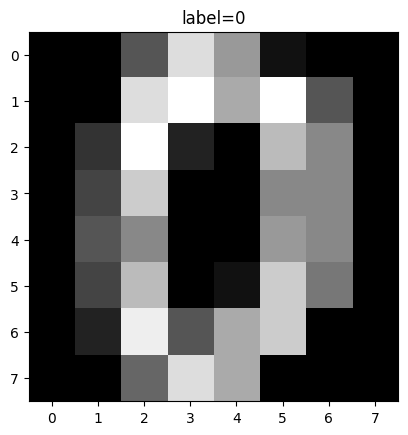

In [13]:
plt.imshow(np.reshape(df.data[0],(8,8)),cmap=plt.cm.gray)
plt.title(f"label={df.target[0]}")
plt.show()

In [14]:
X=df.data
y=df.target

In [16]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)


In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1437, 64)
(360, 64)
(1437,)
(360,)


In [18]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
knn.score(X_test,y_test)

0.9888888888888889

In [20]:
y_predict = knn.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_predict,y_test)
print(cm)

[[39  0  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  1  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  1]
 [ 0  0  0  0  0 36  0  0  0  1]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 44  0  0]
 [ 0  0  0  0  0  0  0  0 32  1]
 [ 0  0  0  0  0  0  0  0  0 27]]


<Axes: >

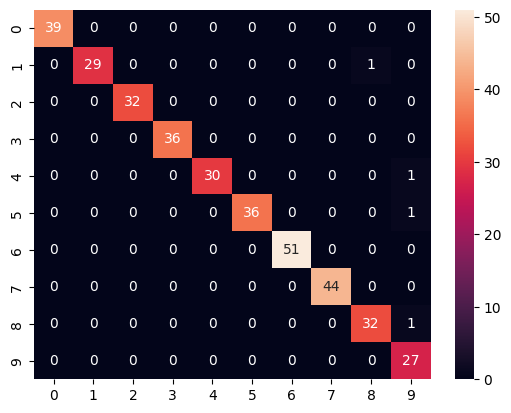

In [22]:
import seaborn as sns
sns.heatmap(cm,annot=True)
